In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import animation

In [2]:
class TowerOfHanoi():
    def __init__(self, n, disc_height=1):
        
        if not isinstance(n, int):
            raise TypeError ("Invalid input as the number of discs")
            
        elif n > 5:
            raise ValueError ("More than 5 disc are not allowed because of the time complexity")
        
        elif n < 1:
            raise ValueError ("Negative values or 0 are not allowed")
            
        self.n_discs = n
        
        self.poles = [Pole(i, n+2) for i in range(0, 21, 10)]
        
        self.disc_height = disc_height
        self.disc_radii = np.linspace(1, 5, n)
        
        self.poles[0].discs = [Disc(self.poles[0].x, y, w, self.disc_height) for y, w in zip(
            list(range(0, self.disc_height*n, self.disc_height))[::-1], 2*self.disc_radii
                )
            ]
        
        self.n_frames_per_move = 10
        self.n_frames = self.n_frames_per_move*(2**n -1)
        self.movements = []
        self.patches = []
        
    def init_show(self):
        self.fig = plt.figure(figsize=(10,4))
        self.ax = self.fig.add_subplot(111)
        self.ax.axis('off')
        self.ax.set_xlim(-7, 27)
        
        for p in self.poles:
            self.ax.plot([p.x, p.x], [0, p.y], c='k')
        
            if len(p.discs) > 0:
                for d in p.discs:
                    patch = patches.Rectangle(d.calc_xy_coord(), d.width, d.height, color=d.color)
                    self.ax.add_patch(patch)
                    self.patches.append(patch)
                    d.patch = patch

    def solve_tower_of_hanoi(self):
        self.reset()
        
        self.init_show()
        
        n = self.n_discs
        source_pole, aux_pole, dest_pole = self.poles
        
        self._solve_tower_of_hanoi(n, source_pole, aux_pole, dest_pole)
        
        self.ani = animation.FuncAnimation(fig=self.fig, func=self.movement_animation, frames=self.n_frames, interval=100, 
                                         blit=True, repeat=0)

        return self.ani
    
    def _solve_tower_of_hanoi(self, n, source_pole, aux_pole, dest_pole):
        
        # base condition. If one disc is left in source, move it to dest
        if n == 1:
            self.move_disc(source_pole, dest_pole) 
            return
        
        # solve the problem for n-1 discs by moving them from source to aux using dest as intermediate
        self._solve_tower_of_hanoi(n-1, source_pole, dest_pole, aux_pole)
        
        # after solving the n-1 discs problem, move the last dist in source to dest
        self.move_disc(source_pole, dest_pole) 
        
        # now, solve the n-1 disc problem by moving them from aux to dest using source as intermediate
        self._solve_tower_of_hanoi(n-1, aux_pole, source_pole, dest_pole)

    def move_disc(self, source_pole, dest_pole):
        # update disc coordinates
        disc = source_pole.discs[0]
        
        prev_x, prev_y = disc.calc_xy_coord()
        disc.base_center_x = dest_pole.x
        disc.base_center_y = dest_pole.discs[0].base_center_y + self.disc_height if len(dest_pole.discs) > 0 else 0

        new_x, new_y = disc.calc_xy_coord()

        # update pole discs
        source_pole.discs.pop(0)
        dest_pole.discs = [disc] + dest_pole.discs
        
        slope = (new_y - prev_y) / (new_x - prev_x)
        intercept = new_y - (slope*new_x)
        path_x = np.linspace(prev_x, new_x, self.n_frames_per_move)
        path_y = slope*path_x + intercept
        
        self.movements.extend([(disc.patch, x, y) for x, y in zip(path_x, path_y)])
        
    def movement_animation(self, frame):
        self.movements[frame][0].set_xy((self.movements[frame][1], self.movements[frame][2]))

    def reset(self):
        self = self.__init__(self.n_discs, self.disc_height)
        
class Pole():
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.discs = []

class Disc():
    def __init__(self, base_center_x, base_center_y, width, height):
        self.base_center_x = base_center_x 
        self.base_center_y = base_center_y
        self.width = width
        self.height = height
        self.color = np.random.rand(3,)
    
    def calc_xy_coord(self):
        """I find it easy to use the base center of the disc as coordinate. This function helps to find the xy coordinate 
            of the lower left corner of a disc given its base coordinates"""
        return self.base_center_x - self.width/2, self.base_center_y

<IPython.core.display.Javascript object>


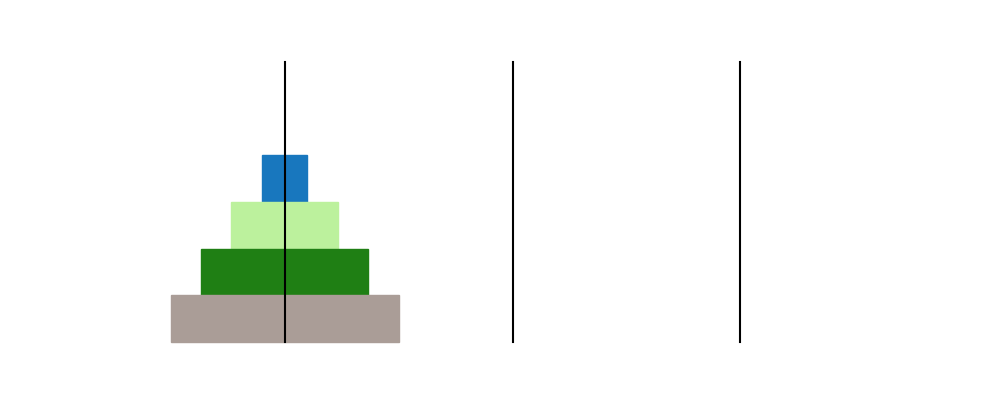

In [3]:
n = 4
TofH = TowerOfHanoi(n)
TofH.init_show()

<IPython.core.display.Javascript object>


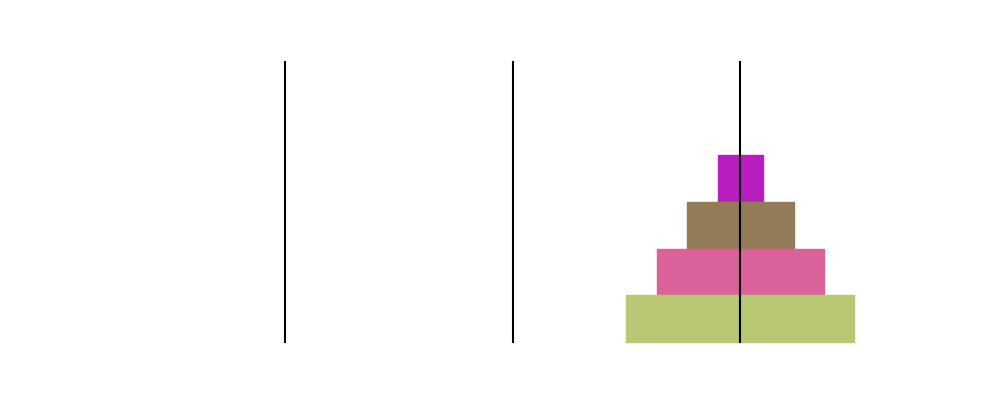

In [4]:
ani = TofH.solve_tower_of_hanoi()
ani.save(f'Tower_of_Hanoi_{n}.gif', writer=animation.PillowWriter(fps=1000//100))

### Here is the saved gif in motion:

![Tower_of_Hanoi_4.gif](Tower_of_Hanoi_4.gif)